# 훈련용 데이터 전처리


In [ ]:
# 필요한 라이브러리 가져오기

from sklearn.preprocessing import LabelEncoder # 라벨인코더(문자형데이터를 숫자형으로 변환하기 위해 사용)
# from sklearn.model_selection import train_test_split # 사용안함(사용할려면 훈련용을 훈련용과 테스트용으로 나누거나 결정필요)
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score, r2_score, f1_score, precision_score, recall_score # 혼동행렬 생성함수, 평균제곱오차, 정확도, 결정계수(R스퀘어), f1점수, 정밀도, 재현율
from sklearn.ensemble import BaggingClassifier # 인공지능 모델

# 보조 라이브러리

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# 맷플롯립에서 폰트매지저(글꼴 관리자)를 가져온다.
import matplotlib.font_manager as fm

# 폰트 파일 설치
!apt-get -qq -y install fonts-nanum > /dev/null

# 글꼴 선택.
fontpath = '/usr/share/fonts/truetype/nanum/NanumSquareRound.ttf'
font = fm.FontProperties(fname=fontpath, size=10)

fm._rebuild()

# 맷플롯립에서 사용할 글꼴 지정
mpl.rc('font', family='NanumSquareRound') 
plt.rc('font', family='NanumSquareRound') 

# 그래프 축에서 음수 부호를 쓸 수 있게 구성
mpl.rc('axes', unicode_minus=False)
plt.rc('axes', unicode_minus=False)

In [ ]:
# 구글 드라이브 마운트

from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 불러올 파일 위치 지정

%cd /content/drive/MyDrive/리미트리스(limitless)/핵심역량프로젝트/전북 장수 사과 당도 품질 데이터/라벨링 데이터 (csv)

/content/drive/.shortcut-targets-by-id/1oazJ6CPCVy4kdmQqj3N-F4U7PynILBX4/리미트리스(limitless)/핵심역량프로젝트/전북 장수 사과 당도 품질 데이터/라벨링 데이터 (csv)


In [ ]:
# 사과 품종별 train데이터 가져오기

sinano = pd.read_csv('apple_train_sinano.csv') # 훈련용 시나노골드 품종 사과 데이터
hongro = pd.read_csv('apple_train_hongro.csv') # 훈련용 홍로 품종 사과 데이터
arisu = pd.read_csv('apple_train_arisu.csv') # 훈련용 아리수 품종 사과 데이터
huji = pd.read_csv('apple_train_huji.csv') # 훈련용 후지 품종 사과 데이터

In [ ]:
# 각각의 사과데이터셋을 하나의 데이터셋으로 통합

tr_apple = pd.concat([huji,sinano,arisu,hongro])

In [ ]:
# 필요없는 열 제거(구분, 데이터셋 타입, 촬영농가위치, 파괴당도, 촬영 각도, 라이센스 고유번호, 라이센스 이름, 원천데이터(이미지) 이름, 이미지 세로크기, 이미지 가로크기, 어노테이션 면적, 세그멘테이션 좌표, 바운딩박스 정보, 촬영거리, 비파괴 당도)

tr_apple = tr_apple.drop(['Unnamed: 0',
                          'type',
                          'position',
                          'sugar_content',
                          'img_angle',
                          'licenses_id',
                          'licenses_name',
                          'img_file_name',
                          'img_height',
                          'img_width',
                          'area',
                          'segmentation',
                          'bbox',
                          'img_dist',
                          'sugar_content_nir'], axis= 1)

In [ ]:
# 중복행 제거

tr_apple = tr_apple.drop_duplicates()

In [ ]:
# 원핫 인코딩 진행(적외선 촬영장비명, 사진촬영장비명, 사과종류, 사진촬영일시, 일출시간, 일몰시간)

tr_apple = pd.get_dummies(data = tr_apple, columns = ['tod_attribute'], prefix = 'tod_attribute')
tr_apple = pd.get_dummies(data = tr_apple, columns = ['img_attribute'], prefix = 'img_attribute')
tr_apple = pd.get_dummies(data = tr_apple, columns = ['apple_kind'], prefix = 'apple_kind')
tr_apple = pd.get_dummies(data = tr_apple, columns = ['img_time'], prefix = 'img_time')
tr_apple = pd.get_dummies(data = tr_apple, columns = ['sunset_time'], prefix = 'sunset_time')
tr_apple = pd.get_dummies(data = tr_apple, columns = ['sunrise_time'], prefix = 'sunrise_time')

In [ ]:
#결측값이 존재하는 행 제거(약 5%의 비율로 결측값이 존재하여 결측값을 대체가 아닌 제거를 선택)

tr_apple = tr_apple.dropna(axis=0)

In [ ]:
# 인덱스 0부터 순차 재정렬

tr_apple = tr_apple.reset_index(drop = True)

In [ ]:
# train_X, train_y 분리

train_y = tr_apple['sugar_grade']
train_X = tr_apple.drop(['sugar_grade'], axis = 1)

In [ ]:
# train_y 데이터프레임 형태로 변환

train_y = pd.DataFrame(train_y)

# 검증용 데이터 전처리


In [ ]:
# validation data 불러오기

sinano1 = pd.read_csv('apple_valid_sinano.csv') # 검증용 시나노 골드 품종 사과 데이터
hongro1 = pd.read_csv('apple_valid_hongro.csv') # 검증용 홍로 품종 사과 데이터
arisu1 = pd.read_csv('apple_valid_arisu.csv') # 검증용 아리수 품종 사과 데이터
huji1 = pd.read_csv('apple_valid_huji.csv') # 검증용 후지 품종 사과 데이터

In [ ]:
# 하나의 데이터셋으로 통합

va_apple = pd.concat([huji1,sinano1,arisu1,hongro1])

In [ ]:
# 필요없는 열 제거(구분, 데이터셋 타입, 촬영농가위치, 파괴당도, 촬영 각도, 라이센스 고유번호, 라이센스 이름, 원천데이터(이미지) 이름, 이미지 세로크기, 이미지 가로크기, 어노테이션 면적, 세그멘테이션 좌표, 바운딩박스 정보, 촬영거리, 비파괴 당도)

va_apple = va_apple.drop(['Unnamed: 0',
                          'type',
                          'position',
                          'sugar_content',
                          'img_angle',
                          'licenses_id',
                          'licenses_name',
                          'img_file_name',
                          'img_height',
                          'img_width',
                          'area',
                          'segmentation',
                          'bbox',
                          'img_dist',
                          'sugar_content_nir'], axis= 1)

In [ ]:
# 중복행 제거

va_apple = va_apple.drop_duplicates()

In [ ]:
# 원핫 인코딩 진행(적외선 촬영장비명, 사진촬영장비명, 사과종류, 사진촬영일시, 일출시간, 일몰시간)

va_apple = pd.get_dummies(data = va_apple, columns = ['tod_attribute'], prefix = 'tod_attribute')
va_apple = pd.get_dummies(data = va_apple, columns = ['img_attribute'], prefix = 'img_attribute')
va_apple = pd.get_dummies(data = va_apple, columns = ['apple_kind'], prefix = 'apple_kind')
va_apple = pd.get_dummies(data = va_apple, columns = ['img_time'], prefix = 'img_time')
va_apple = pd.get_dummies(data = va_apple, columns = ['sunset_time'], prefix = 'sunset_time')
va_apple = pd.get_dummies(data = va_apple, columns = ['sunrise_time'], prefix = 'sunrise_time')

In [ ]:
#결측값이 존재하는 행 제거(약 5%의 비율로 결측값이 존재하여 결측값을 대체가 아닌 제거를 선택)

va_apple = va_apple.dropna(axis=0)

In [ ]:
# 인덱스 0부터 순차 재정렬

va_apple = va_apple.reset_index(drop = True)

In [ ]:
# valid_X, valid_y 분리

valid_y = va_apple['sugar_grade']
valid_X = va_apple.drop(['sugar_grade'], axis = 1)

In [ ]:
# train_y 데이터프레임 형태로 변환

valid_y = pd.DataFrame(valid_y)

# 목표값 라벨 인코딩

In [ ]:
# 훈련용 목표값(당도등급)이 문자형이라 사용할 모델 학습에 사용이 제한되어 숫자형으로 변환

encoder = LabelEncoder()
encoder.fit(train_y)
train_y = encoder.transform(train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# 검증용 목표값(당도등급)이 문자형이라 사용할 모델 학습에 사용이 제한되어 숫자형으로 변환

encoder1 = LabelEncoder()
encoder1.fit(valid_y)
valid_y = encoder.transform(valid_y)

# AI 모델 제작 및 학습

In [ ]:
# AI 모델 불러오기(배깅:데이터 중복을 허용해서 샘플링하여 훈련 세트의 서브셋을 구성하여 하나의 분류기를 다르게 학습시키는 인공지능 모델)

model = BaggingClassifier(n_estimators = 120, random_state = 50)

In [ ]:
# AI 모델 학습

model.fit(train_X, train_y)

BaggingClassifier(n_estimators=120, random_state=50)

In [ ]:
# 예측치 저장

예측치 = model.predict(valid_X)

In [ ]:
# 실측치 저장

실측치 = valid_y

In [ ]:
# 평균제곱오차(0에 가까울수록 예측력이 좋음)

print('평균제곱오차: %.2f' % mean_squared_error(실측치, 예측치)) # f포맷팅방식 사용

# loss(손실) = cost(비용) = error(오차)

평균제곱오차: 0.08


In [ ]:
# 정확도(전체 대비 정확하게 예측한 비율)

print(f'정확도 = {accuracy_score(실측치, 예측치): .4f}\n')

정확도 =  0.9515



In [ ]:
# 결정계수(1에 가까울수록 예측력이 좋음)

print('결정계수: %.2f' % r2_score(실측치, 예측치))

결정계수: 0.87


In [ ]:
# f1점수(정밀도와 재현율의 평균)

print('f1 score: %.2f' % f1_score(실측치, 예측치, average = 'micro'))

f1 score: 0.95


In [ ]:
# 정밀도(예측을 positive로 한 대상중 예측과 실제값이 positive로 일치한 데이터의 비율))

print('정밀도: %.2f' % precision_score(실측치, 예측치, average = 'micro'))

정밀도: 0.95


In [ ]:
# 재현율(실제값이 positive인 대상 중 예측값과 실제값이 positive로 일치한 데이터의 비율))

print('재현율: %.2f' % recall_score(실측치, 예측치, average = 'micro'))

재현율: 0.95


In [ ]:
# 혼동행렬(오차행렬)을 생성.

혼동행렬 = confusion_matrix(실측치, 예측치)
혼동행렬

array([[9375,  233,  119],
       [ 301, 9755,  252],
       [ 128,  222, 5495]])

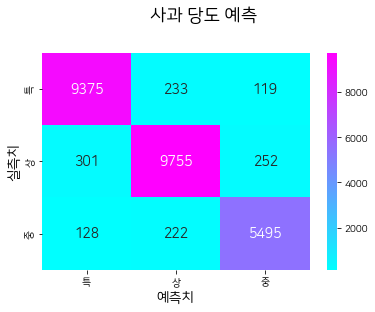

In [ ]:
# 혼동행렬 히트맵으로 출력

등급 = ['특','상','중'] 

sns.heatmap(data = 혼동행렬, 
            annot=True,  # 각 상자안의 숫자를 표시할지 여부(기본값은 None으로 별도 입력하지않으면 나오지 않음)
            annot_kws={"size": 14}, # 각 상자 안에 글자를 14포인트로 표시.
            cmap= 'cool', # cmap그래프의 색깔지정
            xticklabels= 등급, # x축 눈금제목 지정 
            yticklabels= 등급, # y축 눈금제목 지정
            fmt = 'd') # 상자안의 숫자 전체 표시
plt.xlabel('예측치', fontsize=14) # x축 제목 지정
plt.ylabel('실측치', fontsize=14) # y축 제목 지정

plt.suptitle("사과 당도 예측", y=1.04, size=18) # 그래프 제목 지정
plt.show() # 출력